In [4]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
[[[0.8901961  0.39607844 0.16470589]
  [0.8901961  0.39607844 0.16470589]
  [0.8862745  0.39215687 0.16078432]
  ...
  [0.9137255  0.4117647  0.17254902]
  [0.9137255  0.4117647  0.17254902]
  [0.9098039  0.40784314 0.16862746]]

 [[0.8901961  0.39607844 0.16470589]
  [0.8901961  0.39607844 0.16470589]
  [0.8862745  0.39215687 0.16078432]
  ...
  [0.9137255  0.4117647  0.17254902]
  [0.9137255  0.4117647  0.17254902]
  [0.9098039  0.40784314 0.16862746]]

 [[0.8862745  0.39215687 0.16078432]
  [0.8862745  0.39215687 0.16078432]
  [0.8862745  0.39215687 0.16078432]
  ...
  [0.91764706 0.40784314 0.17254902]
  [0.9137255  0.40392157 0.16862746]
  [0.9137255  0.40392157 0.16862746]]

 ...

 [[0.04313726 0.3764706  0.6       ]
  [0.04313726 0.3764706  0.6       ]
  [0.04313726 0.3764706  0.6       ]
  ...
  [0.827451   0.39215687 0.1764706 ]
  [0.8392157  0.39215687 0.18039216]
  [0.83137256 0.39607844 0.18039216]]

 [[0.10588235 0.35686275 0.5372549 ]
  [0.10588235

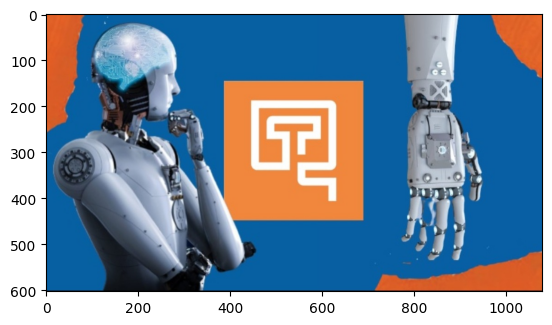

In [66]:
imagem = mpimg.imread("download.png") # iniciamos carregando a imagem utilizando matplotlib

print(type(imagem))
print(imagem) # A partir dos valores aqui printados podemos perceber que se trata de uma imagem RGB
plt.imshow(imagem)
plt.show()

In [67]:
def convolution2D(image: np.ndarray, kernel: np.ndarray):
    """ Realiza a convulução de uma imagem utilizando um kernel
    permitindo assim a implementação de filtros variados
    """
    image_y, image_x, color = image.shape # primeiro obtemos as dimensões da imagem, e seu esquema de cores
    # como não queremos que a imagem contenha uma borda preta causada pela falta de pixels no kernel nas laterais
    # realizamos um padding na imagem, igual ao número de pixels que o kernel iria utilizar, por exemplo,
    # um kernel 3x3 vai precisar de 1 pixel a mais, um de 5x5 vai precisar de 2 e etc.
    padding = int((kernel.shape[0] - 1)/2);
    # preenchermos estes pixeis de padding utilizando a cor da borda, assim evitamos bordas de cor inesperada
    padded = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='edge')
    # criamos a imagem pronta sendo apenas um array numpy cheio de zeros.
    processed_image = np.zeros((image_y, image_x, color))
    # para cada pixel x e y da imagem, devemos aplicar o kernel sobre a matriz quadrada de mesmo tamanho
    # que contem o pixel na posição no meio da matriz, assim vamos convolvendo sobre todos os pixeis da imagem
    for i in range(padding, image_x):
        for j in range(padding, image_y):
            for k in range(color):
                # utilizando slice para cortar a matriz quadrada de mesmo tamanho do kernel da imagem
                sliced = padded[(j - padding):(j + padding +1 ), (i - padding):(i + padding +1),k]
                # setamos um dos atributos de cor do pixel como sendo a convulação do pedaço de imagem com o kernel
                processed_image[j - padding][i - padding][k] = np.sum(sliced * kernel)
    return processed_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


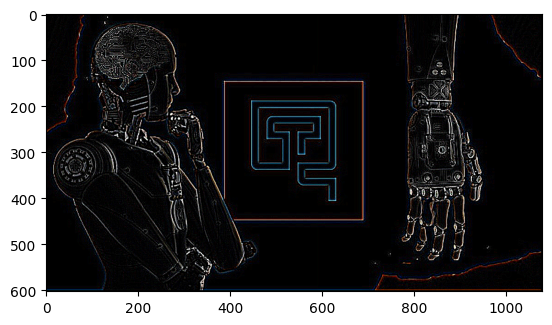

In [68]:
# Teste com filtro laplaciano, kernel tirado de: http://www.ic.uff.br/~aconci/gabor.pdf
kernel = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1 , 0],
    [0, 0, -1, 0, 0]]
)
resultado = convolution2D(imagem, kernel)
plt.imshow(resultado)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


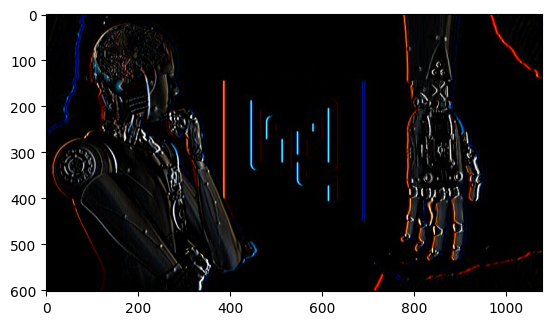

In [73]:
# filtro de sobel, tirado da wikipedia
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]]
)
resultado = convolution2D(imagem, kernel)
plt.imshow(resultado)
plt.show()

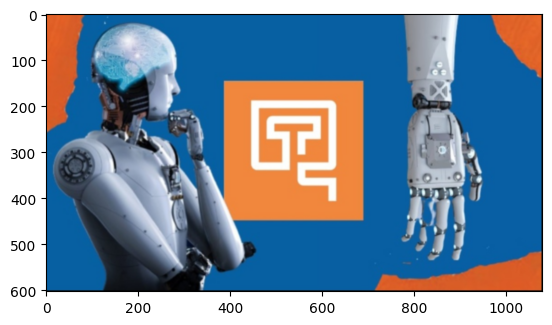

In [74]:
# filtro da média, tirado da wikipedia
kernel = np.ones((3, 3))
kernel = kernel * 1/9

resultado = convolution2D(imagem, kernel)
plt.imshow(resultado)
plt.show()

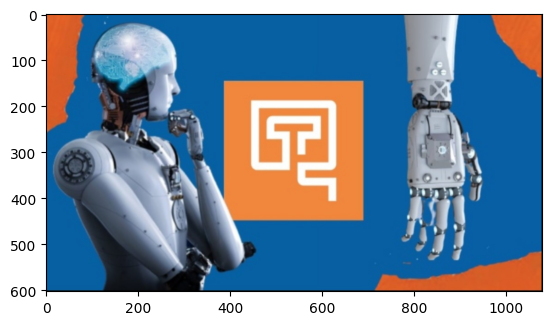

In [75]:
# filtro gaussiano, tirado da wikipedia
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])
kernel = kernel * (1/16)

resultado = convolution2D(imagem, kernel)
plt.imshow(resultado)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


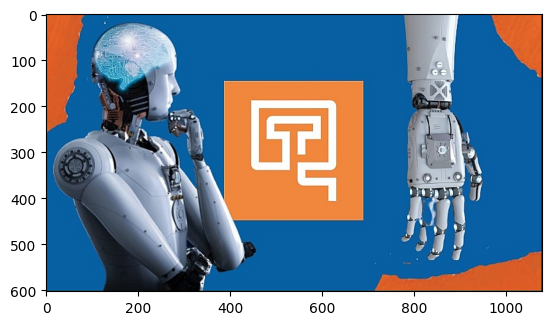

In [76]:
# filtro unsharp masking, tirado da wikipedia
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

resultado = convolution2D(imagem, kernel)
plt.imshow(resultado)
plt.show()